## Introduction
When an email lands in your inbox, how does your email service know whether it’s real or spam? This evaluation is made billions of times per day, and one possible method is logistic regression.

Logistic regression is a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group.

For example, we could use a logistic regression model to predict the probability that an incoming email is spam. If that probability is greater than 0.5, we could automatically send it to a spam folder. This is called binary classification because there are only two groups (eg., spam or not spam).

Some other examples of problems that we could solve using logistic regression:

Disease identification — Is a tumor malignant?
Customer conversion — Will a customer arriving on a sign-up page enroll in a service?
In this lesson you will learn how to perform logistic regression and use it to make predictions!

If you are unfamiliar with linear regression, we recommend you review it before proceeding. Otherwise, let’s dive in!

Codecademy University’s Data Science department is interested in creating a model to predict whether or not a student will pass the final exam of its Introductory Machine Learning course. They plan to accomplish this by building a logistic regression model that predicts the probability of passing based on the number of hours a student reports studying.

Run the code in script.py to plot the data. 0 indicates that a student failed the exam, and 1 indicates a student passed the exam.

How many hours does a student need to study to pass the exam?

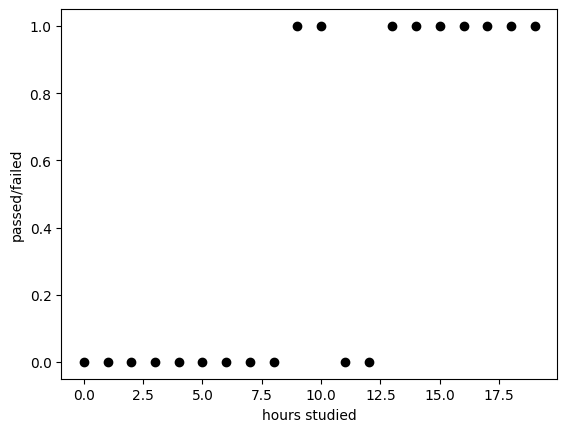

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
codecademyU = pd.read_csv('codecademyU.csv')

# Scatter plot of exam passage vs number of hours studied
plt.scatter(x = 'hours_studied', y = 'passed_exam', data = codecademyU, color='black')
plt.ylabel('passed/failed')
plt.xlabel('hours studied')

plt.show()

# Logistic Regression

We saw that predicted outcomes from a linear regression model range from negative to positive infinity. These predictions don’t really make sense for a classification problem. Step in logistic regression!

To build a logistic regression model, we apply a logit link function to the left-hand side of our linear regression function. Remember the equation for a linear model looks like this:

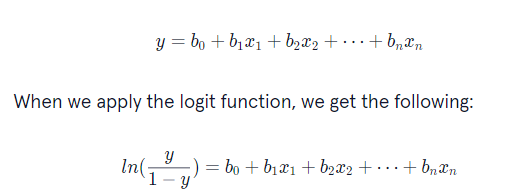

For the Codecademy University example, this means that we are fitting the curve shown below to our data — instead of a line, like in linear regression:

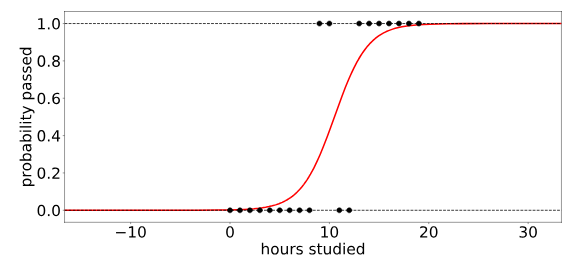

Notice that the red line stays between 0 and 1 on the y-axis. It now makes sense to interpret this value as a probability of group membership; whereas that would have been non-sensical for regular linear regression.

Note that this is a pretty nifty trick for adapting a linear regression model to solve classification problems! There are actually many other kinds of link functions that we can use for different adaptations.

d:\Documentos\Codecademy\MachineLearningEngineer\MLEngineerCourse.env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Documentos\Codecademy\MachineLearningEngineer\MLEngineerCourse.env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


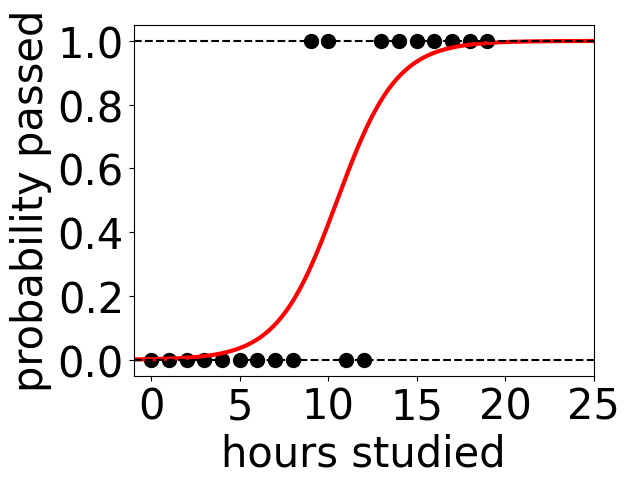

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
codecademyU = pd.read_csv('codecademyU.csv')

# Define five_hour_studier below

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']]
passed_exam = codecademyU[['passed_exam']]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Plug sample data into fitted model
sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
probability = model.predict_proba(sample_x)[:,1]

# Plot exam data
plt.scatter(hours_studied, passed_exam, color='black', s=100)

# Plot logistic curve
plt.plot(sample_x, probability, color='red', linewidth=3)

# Customization for readability
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

# Label plot and set limits
plt.ylabel('probability passed', fontsize = 30)
plt.xlabel('hours studied', fontsize = 30)
plt.xlim(-1, 25)
plt.tight_layout()

# Show the plot
plt.show()
five_hour_studier = 0

## Log-Odds

So far, we’ve learned that the equation for a logistic regression model looks like this:

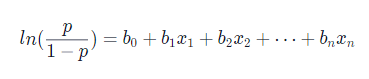

Note that we’ve replaced y with the letter p because we are going to interpret it as a probability (eg., the probability of a student passing the exam). The whole left-hand side of this equation is called log-odds because it is the natural logarithm (ln) of odds (p/(1-p)). The right-hand side of this equation looks exactly like regular linear regression!

In order to understand how this link function works, let’s dig into the interpretation of log-odds a little more. The odds of an event occurring is:

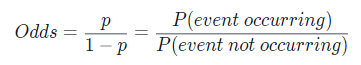

For example, suppose that the probability a student passes an exam is 0.7. That means the probability of failing is 1 - 0.7 = 0.3. Thus, the odds of passing are:

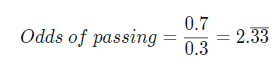

This means that students are 2.33 times more likely to pass than to fail.

Odds can only be a positive number. When we take the natural log of odds (the log odds), we transform the odds from a positive value to a number between negative and positive infinity — which is exactly what we need! The logit function (log odds) transforms a probability (which is a number between 0 and 1) into a continuous value that can be positive or negative.

In [6]:
import numpy as np
from exam import hours_studied, calculated_coefficients, intercept

# Calculate odds_of_rain

odds_of_rain = 0.4 / (1-0.4)

# Calculate log_odds_of_rain

log_odds_of_rain = np.log(odds_of_rain)

# Calculate odds_on_time
odds_on_time = 0.9 / (1-0.9)


# Calculate log_odds_on_time

log_odds_on_time = np.log(odds_on_time)